# Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
<br>https://www.kaggle.com/rouseguy/bankbalanced

In [2]:
# Load the dataset
df = pd.read_csv("bank_dataset.csv")

In [3]:
# Inspect the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Look for missing values and check types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
# Start preparing the data
# 0th column: age
# It's already an int64 -> okay, skip

Original categories:
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Reduced num of cat. from 12 to 7


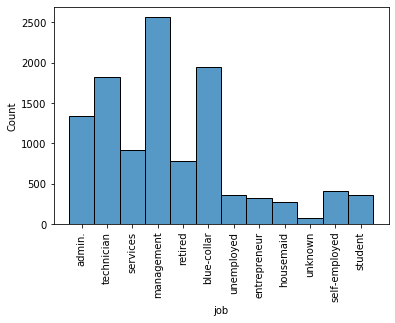

In [6]:
# 1st column: job
# List categories
job_categories = df["job"].unique()
print("Original categories:")
print(job_categories)
g = sns.histplot(data=df["job"])
g.set_xticklabels(job_categories, rotation=90)
# Group together some categories
df["job"] = df["job"].replace(["housemaid"], "services")
df["job"] = df["job"].replace(["self-employed"], "entrepreneur")
df["job"] = df["job"].replace(["admin."], "management")
df["job"] = df["job"].replace(["unemployed", "unknown", "student"], "other")
print("Reduced num of cat. from {} to {}".format(len(job_categories),
                                              len(df["job"].unique())))

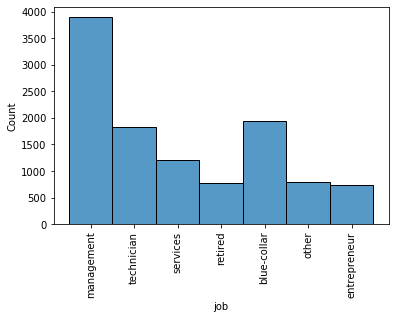

In [7]:
g = sns.histplot(data=df["job"])
g.set_xticklabels(df["job"].unique(), rotation=90);

In [8]:
# 2nd column: marital
# List categories
print("Marital categories:")
print(df["marital"].unique())
# Ok, fine

Marital categories:
['married' 'single' 'divorced']


In [9]:
# 3rd column: education
# List categories
print("Education categories:")
print(df["education"].unique())
df["education"] = df["education"].map({"unknown":4, "tertiary":3, "secondary":2, "primary":1})
# Ok, fine

Education categories:
['secondary' 'tertiary' 'primary' 'unknown']


In [10]:
# 4th column: default
print("Default categories:")
print(df["default"].unique())
# Convert to 1 (yes) / 0 (no)
df["default"] = df["default"].map({"yes":1, "no":0})

Default categories:
['no' 'yes']


In [11]:
# 5th column: balance
# It's already an int64 -> okay, skip

In [12]:
# 6th column: housing
print("Housing categories:")
print(df["housing"].unique())
# Convert to 1 (yes) / 0 (no)
df["housing"] = df["housing"].map({"yes":1, "no":0})

Housing categories:
['yes' 'no']


In [13]:
# 7th column: loan
print("Loan categories:")
print(df["loan"].unique())
# Convert to 1 (yes) / 0 (no)
df["loan"] = df["loan"].map({"yes":1, "no":0})

Loan categories:
['no' 'yes']


In [14]:
# 8th column: contact
print("Contact categories:")
print(df["contact"].unique())
# Remove this column, it has no meaning
#df = df.drop(columns=["contact"])

Contact categories:
['unknown' 'cellular' 'telephone']


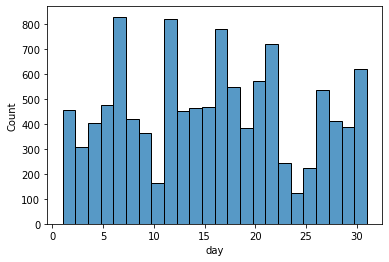

In [15]:
# 9th column: days
sns.histplot(data=df["day"])
# Remove this column, it has no meaning, we don't know if it was a workday, etc
df.drop(columns=["day"], inplace=True)

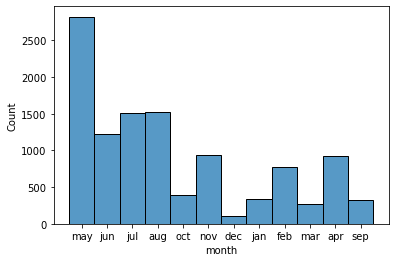

In [16]:
import calendar
# 10th column: month
sns.histplot(data=df["month"])
# # Convert to number of the month
df['month'] = df['month'].apply(lambda x: list(calendar.month_abbr).index(x.capitalize()))

In [17]:
# 11th column: duration
# It's already an int64 -> okay, skip

In [18]:
# 12th column: campaign
# Note: it's the num of times the client was contacted
# It's already an int64 -> okay, skip

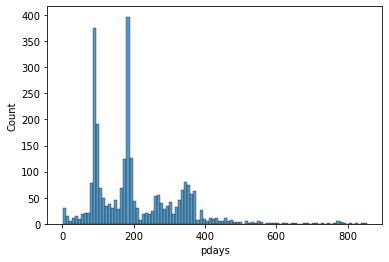

In [19]:
# 13th column: pdays
# Note: it's the num of days since last contact
# -1 if never contacted before
# df.pdays.value_counts()
sns.histplot(data=df.loc[df["pdays"] != -1, "pdays"], bins=100)

In [20]:
# max value is ~ 800, set the -1 bin far far away
df.loc[df["pdays"] == -1, "pdays"] = 100000

In [21]:
# 14th column: previous
# Note: it's the num of times a given client was contacted before campaign
# It's already an int64 -> okay, skip

In [22]:
# 15th column: poutcome
# Note: previous campaign outcome
# List categories
print("Poutcome categories:")
print(df["poutcome"].unique())

Poutcome categories:
['unknown' 'other' 'failure' 'success']


In [23]:
# 16th column: deposit
# Note: previous campaign outcome
# List categories
print("Deposit:")
print(df["deposit"].unique())
# Convert to 1 (yes) / 0 (no)
df["deposit"] = df["deposit"].map({"yes":1, "no":0})

Deposit:
['yes' 'no']


In [24]:
df.to_csv("bank_dataset_cleaned.csv")

In [25]:
# Convert categorical variables to dummies
df_w_dummies = pd.get_dummies(data=df, columns = ['job', 'marital', 'poutcome', 'month'], \
                              prefix = ['job', 'marital', 'poutcome', 'month'])
df_w_dummies.head()

,age,education,default,balance,housing,loan,contact,duration,campaign,pdays,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,59,2,0,2343,1,0,unknown,1042,1,100000,...,0,0,1,0,0,0,0,0,0,0
1,56,2,0,45,0,0,unknown,1467,1,100000,...,0,0,1,0,0,0,0,0,0,0
2,41,2,0,1270,1,0,unknown,1389,1,100000,...,0,0,1,0,0,0,0,0,0,0
3,55,2,0,2476,1,0,unknown,579,1,100000,...,0,0,1,0,0,0,0,0,0,0
4,54,3,0,184,0,0,unknown,673,2,100000,...,0,0,1,0,0,0,0,0,0,0


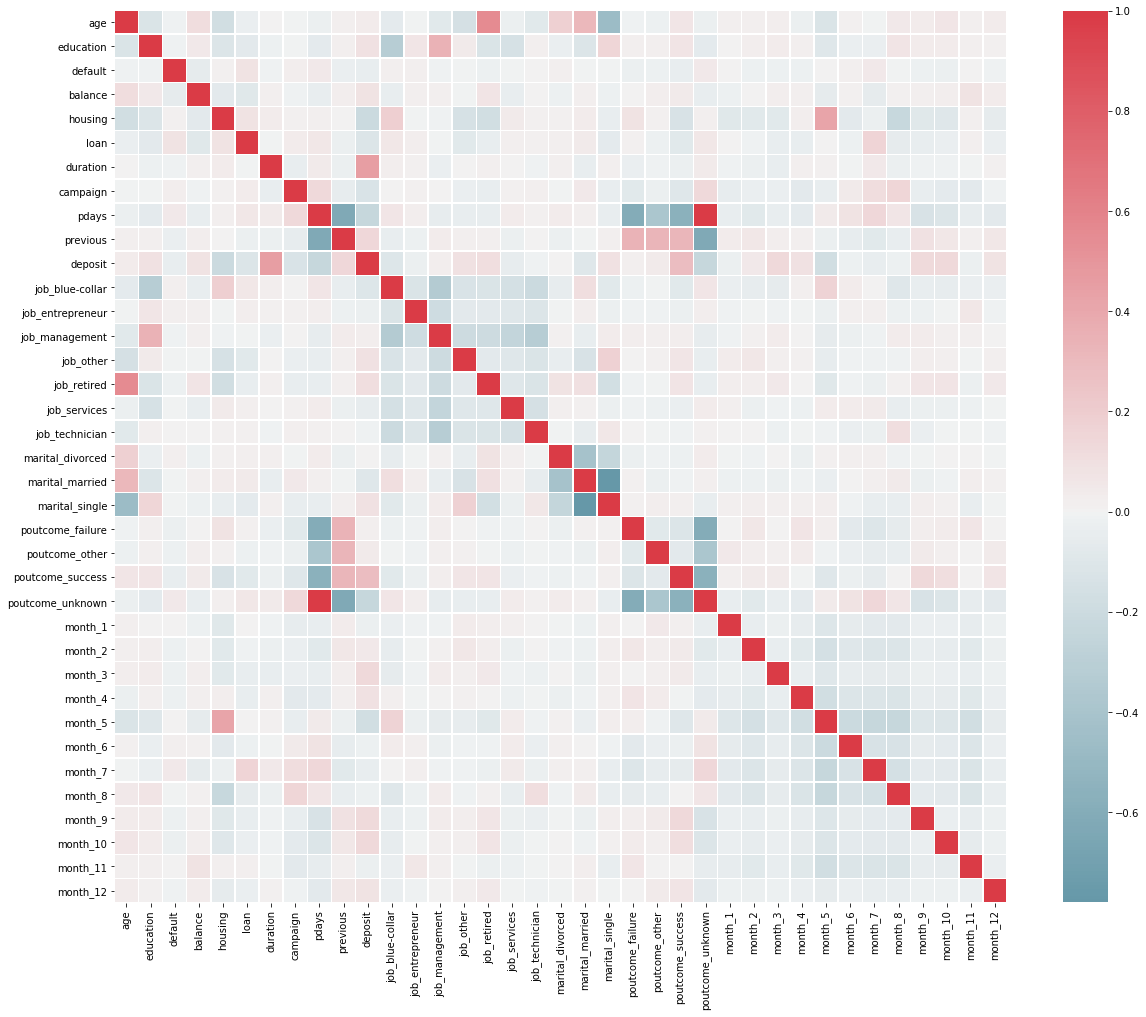

In [26]:
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = df_w_dummies.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82});